# Autoencoder reconstruction best 10 worst 10 and a distribution

In [52]:
# Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Pathing
import sys
sys.path.append("../src")
from os.path import join
from results import prefix

# Results
import results
results = reload(results)

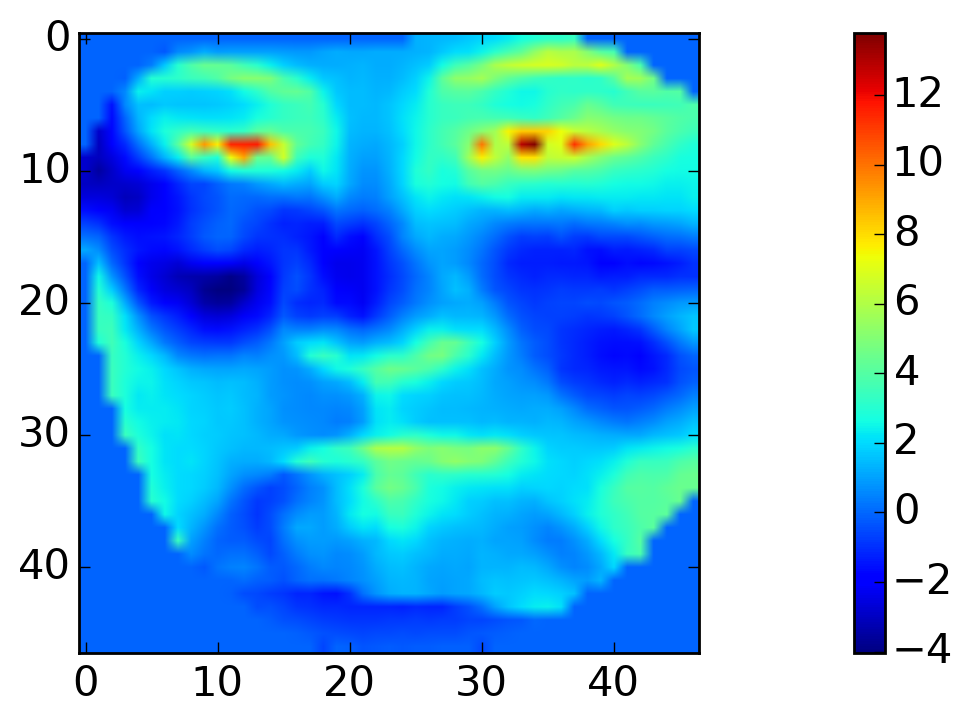

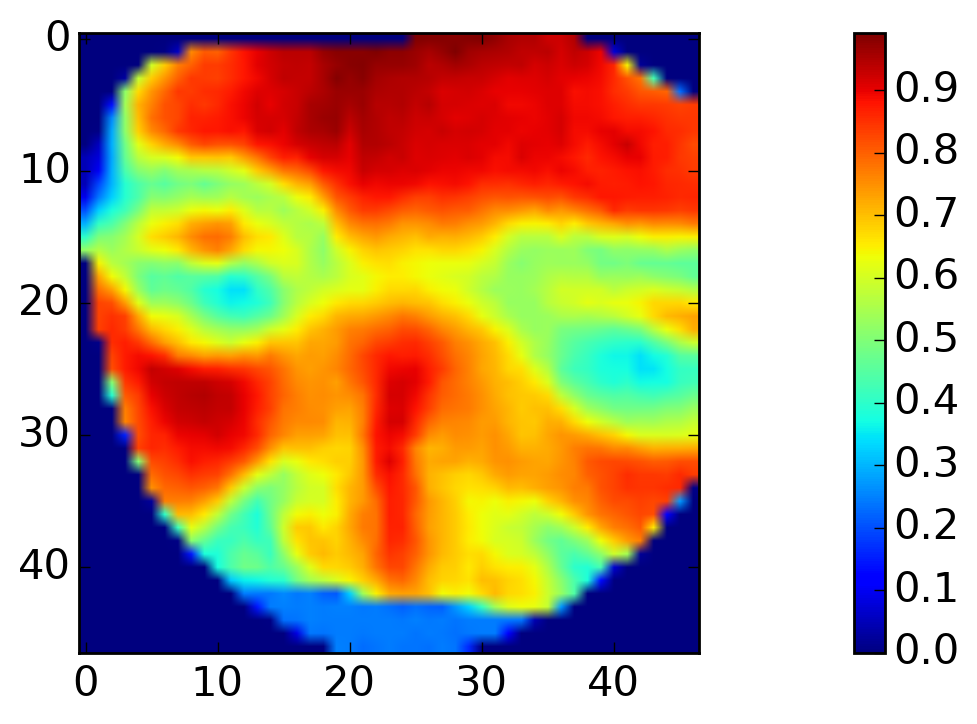

/home/luka/v/lm1015-tmp/data/2016_08_03/auto_003


Exception IOError: (107, 'Transport endpoint is not connected') in <bound method NpzFile.__del__ of <numpy.lib.npyio.NpzFile object at 0x7fc2971adf90>> ignored
Exception IOError: (107, 'Transport endpoint is not connected') in <bound method NpzFile.__del__ of <numpy.lib.npyio.NpzFile object at 0x7fc288ed4150>> ignored
Exception IOError: (107, 'Transport endpoint is not connected') in <bound method NpzFile.__del__ of <numpy.lib.npyio.NpzFile object at 0x7fc2971ad510>> ignored


In [53]:
ID = 3
date = '2016_08_03'
group = 'auto'

try:
    Results = results.Results
    r = Results(date, ID,local=False,experiment_group=group)
    print join('/home/luka/v/lm1015-tmp/data',join(date,group+'_'+prefix(ID,3)))
except IOError as io:
    print io
except AttributeError as ae:
    print ae

Mean squared error for autoencoder on test set:
final : 0.48907 0.06544
early : 0.53666 0.07215


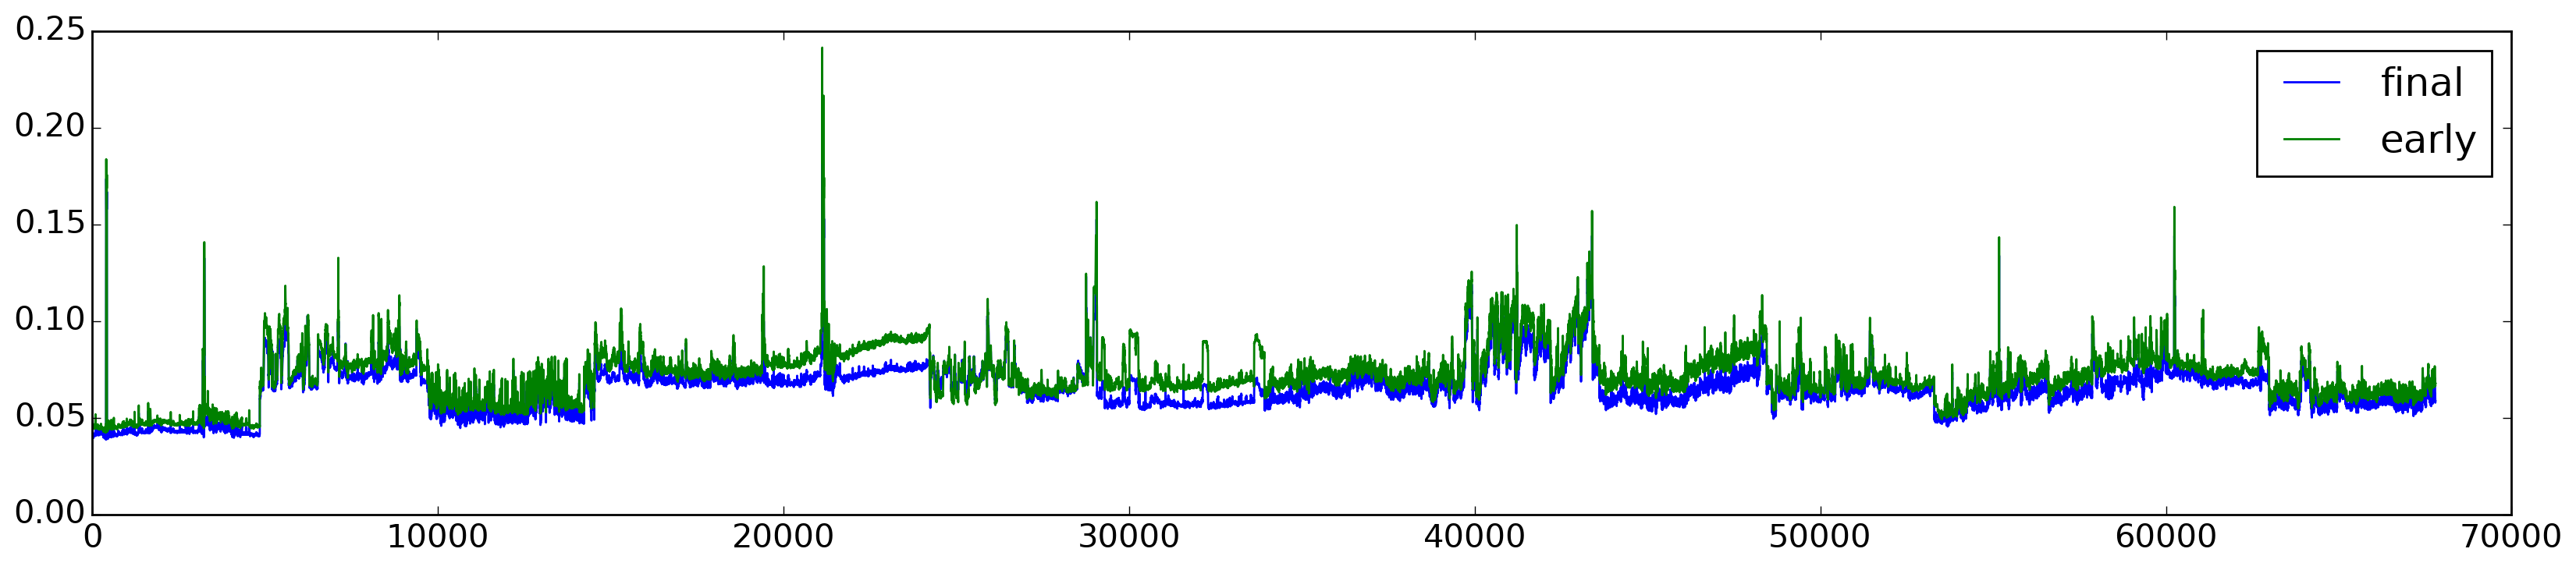

In [4]:
r.print_auto_results()
plt.figure()
plt.plot(r.final_model['true_losses'],label='final')
plt.plot(r.early_model['true_losses'],label='early')
plt.legend()

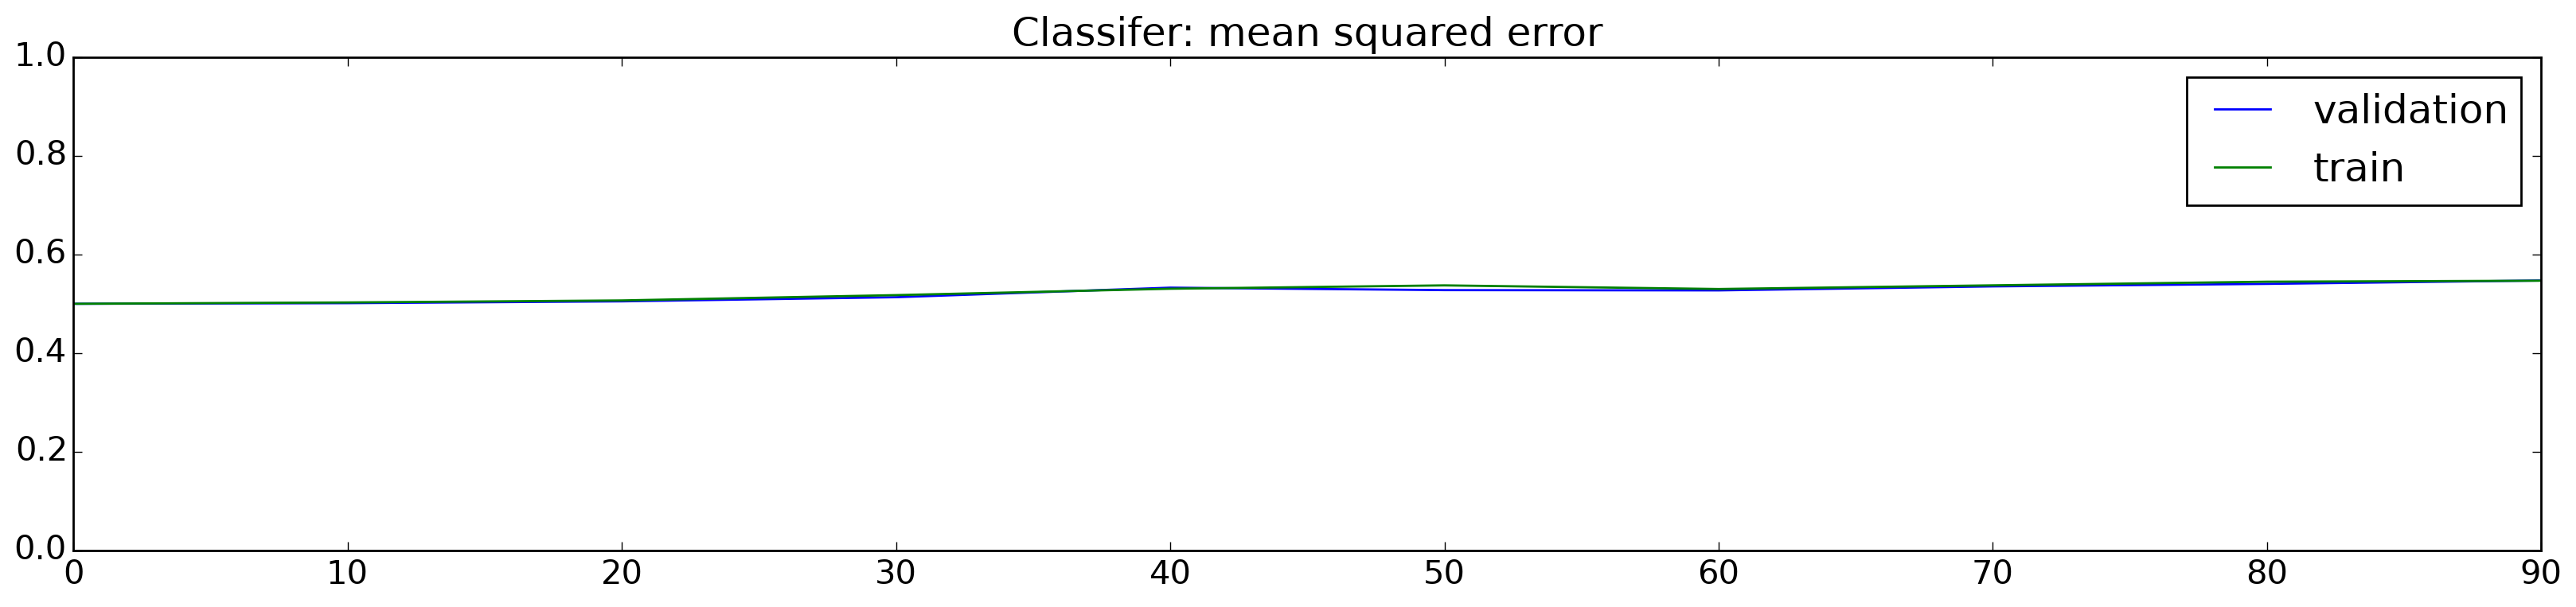

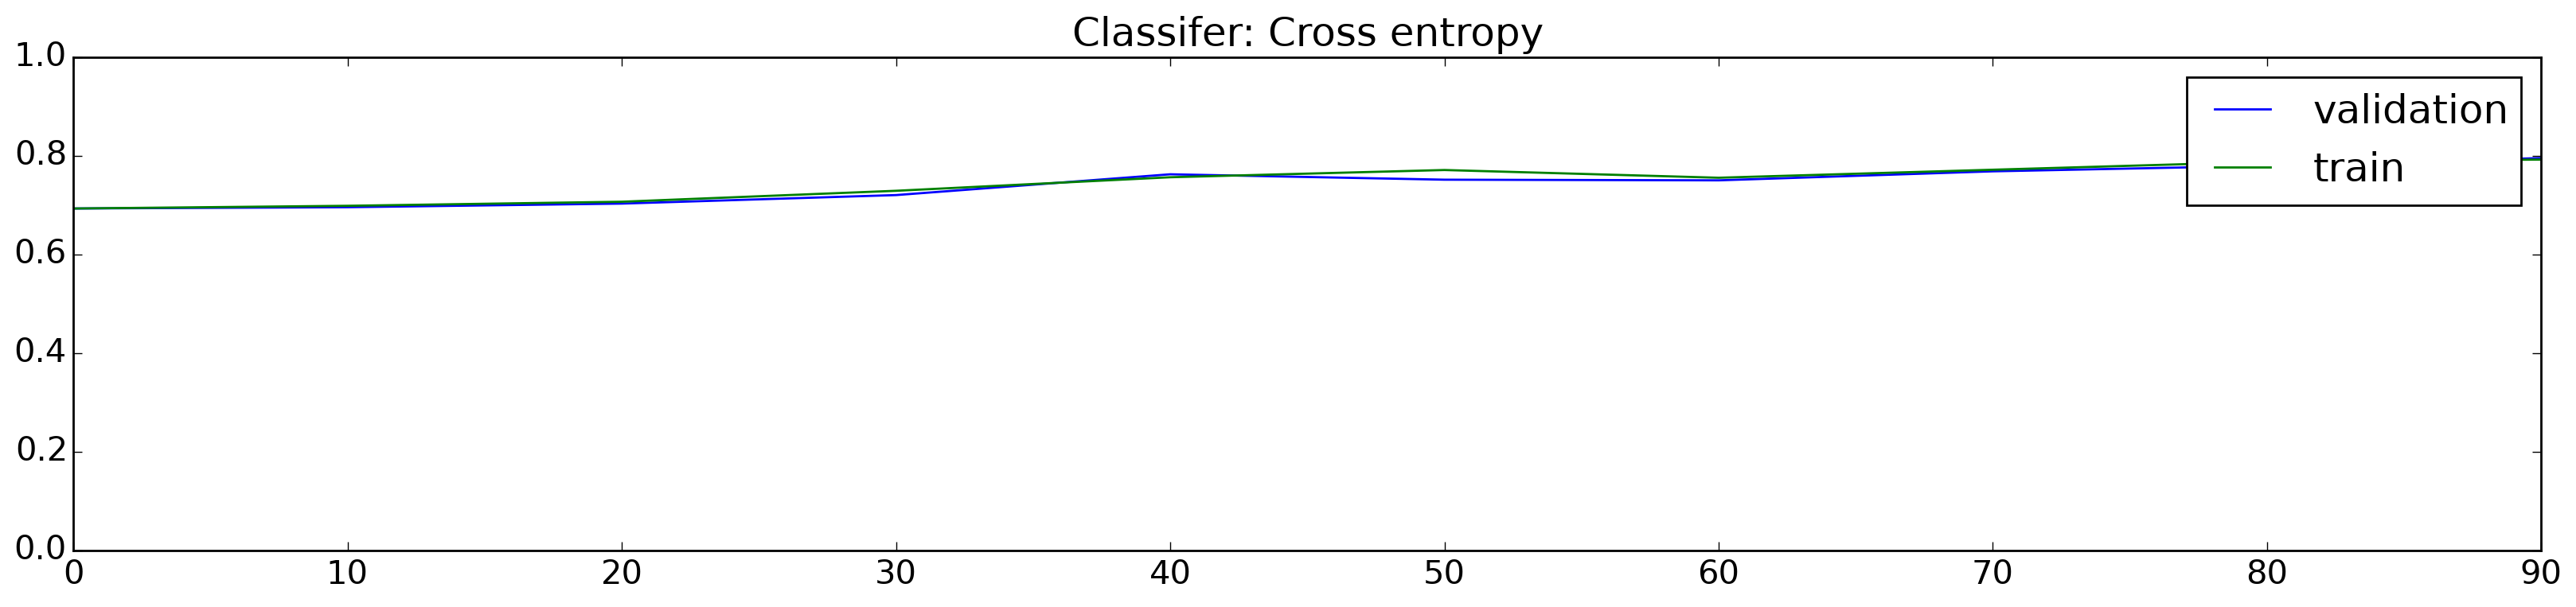

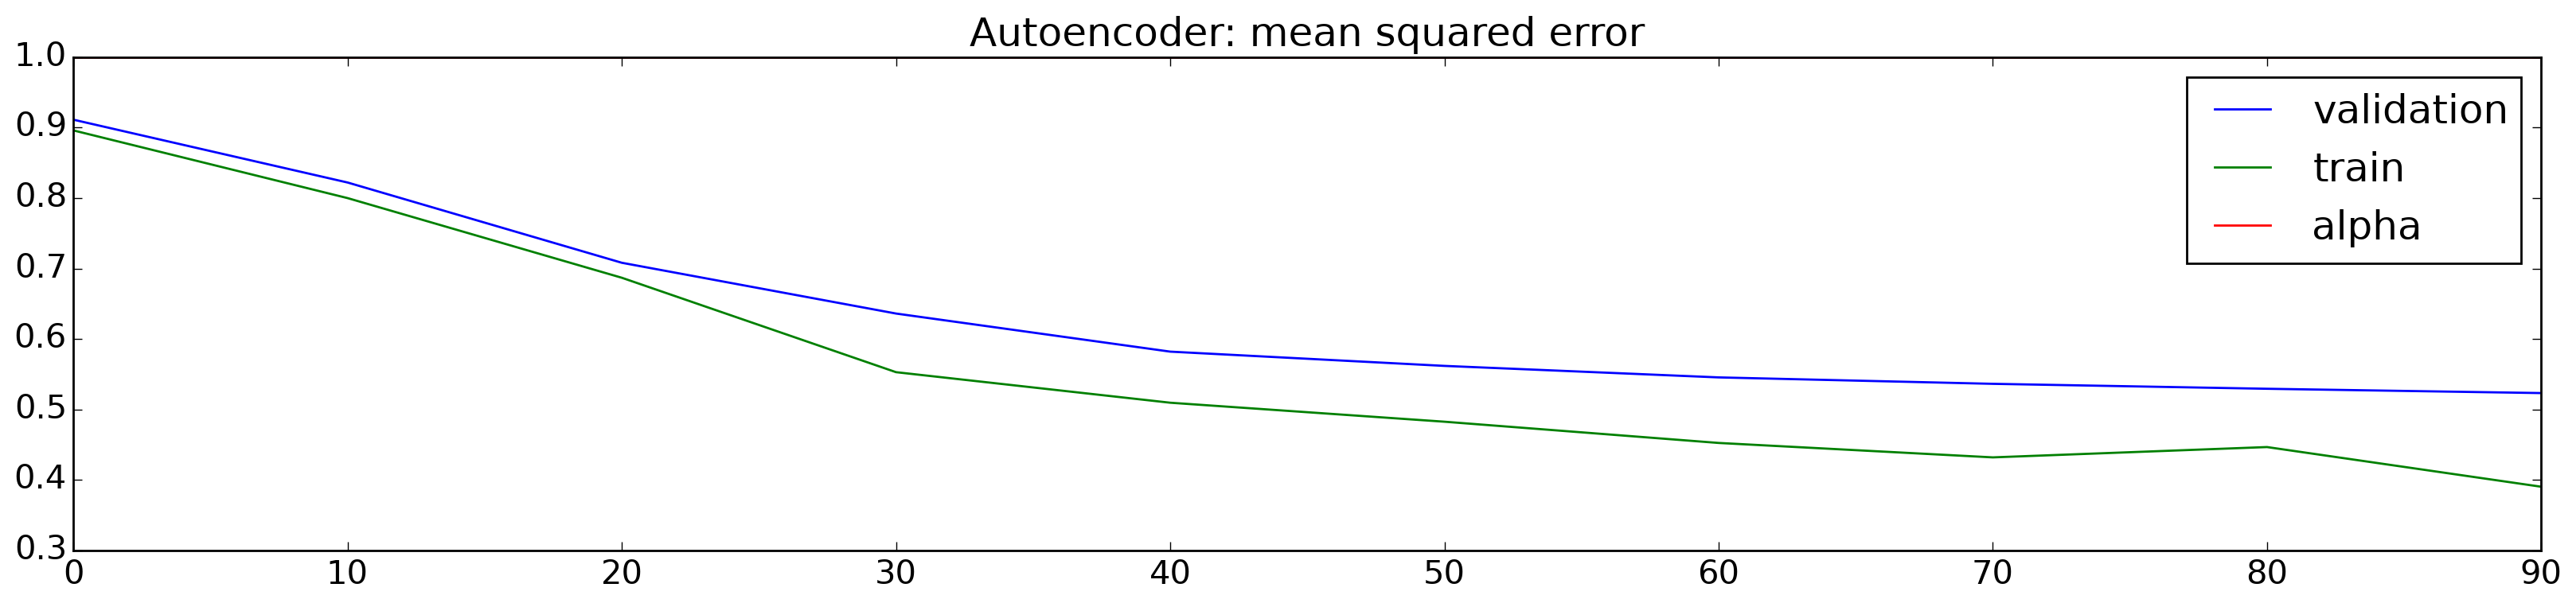

In [5]:
r.lmsq()
r.cross()
r.auto()

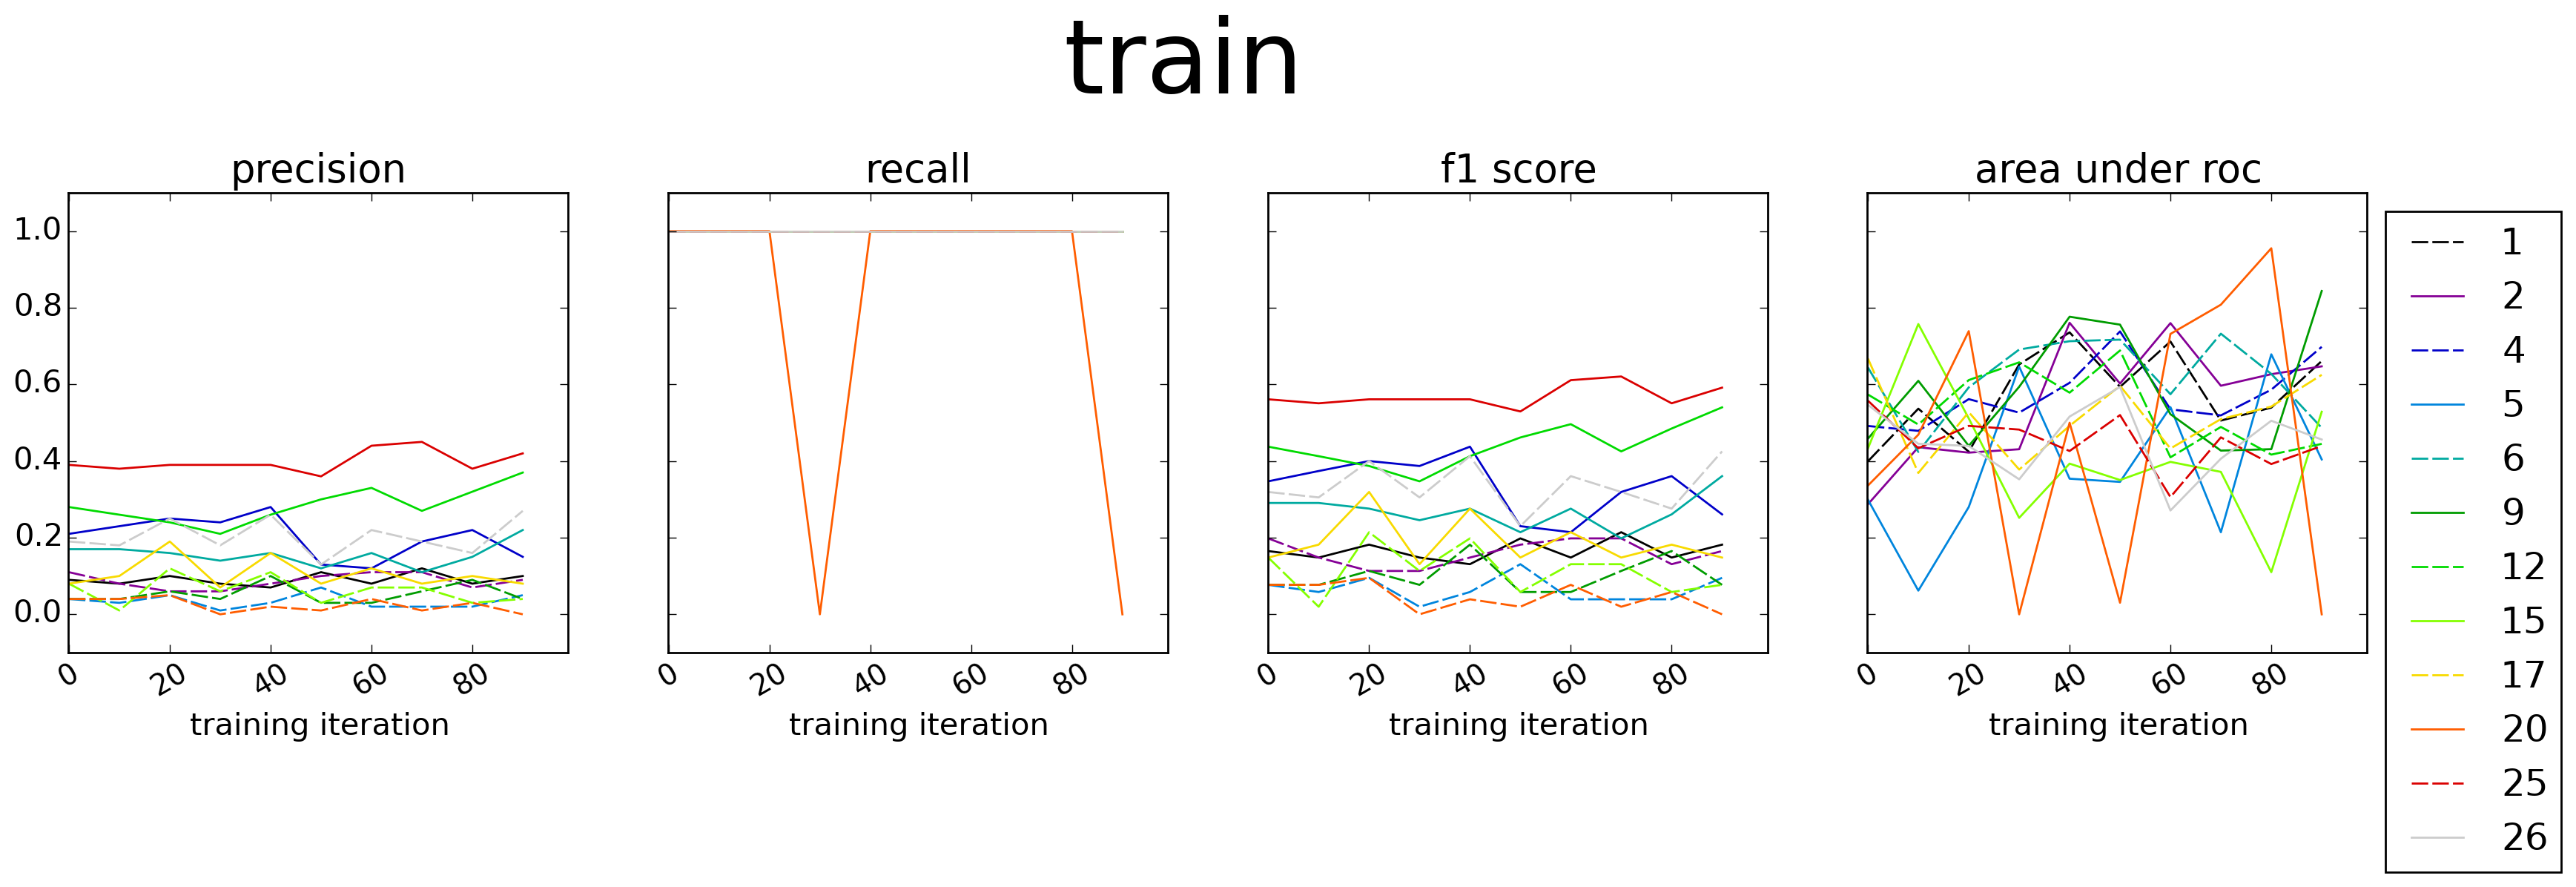

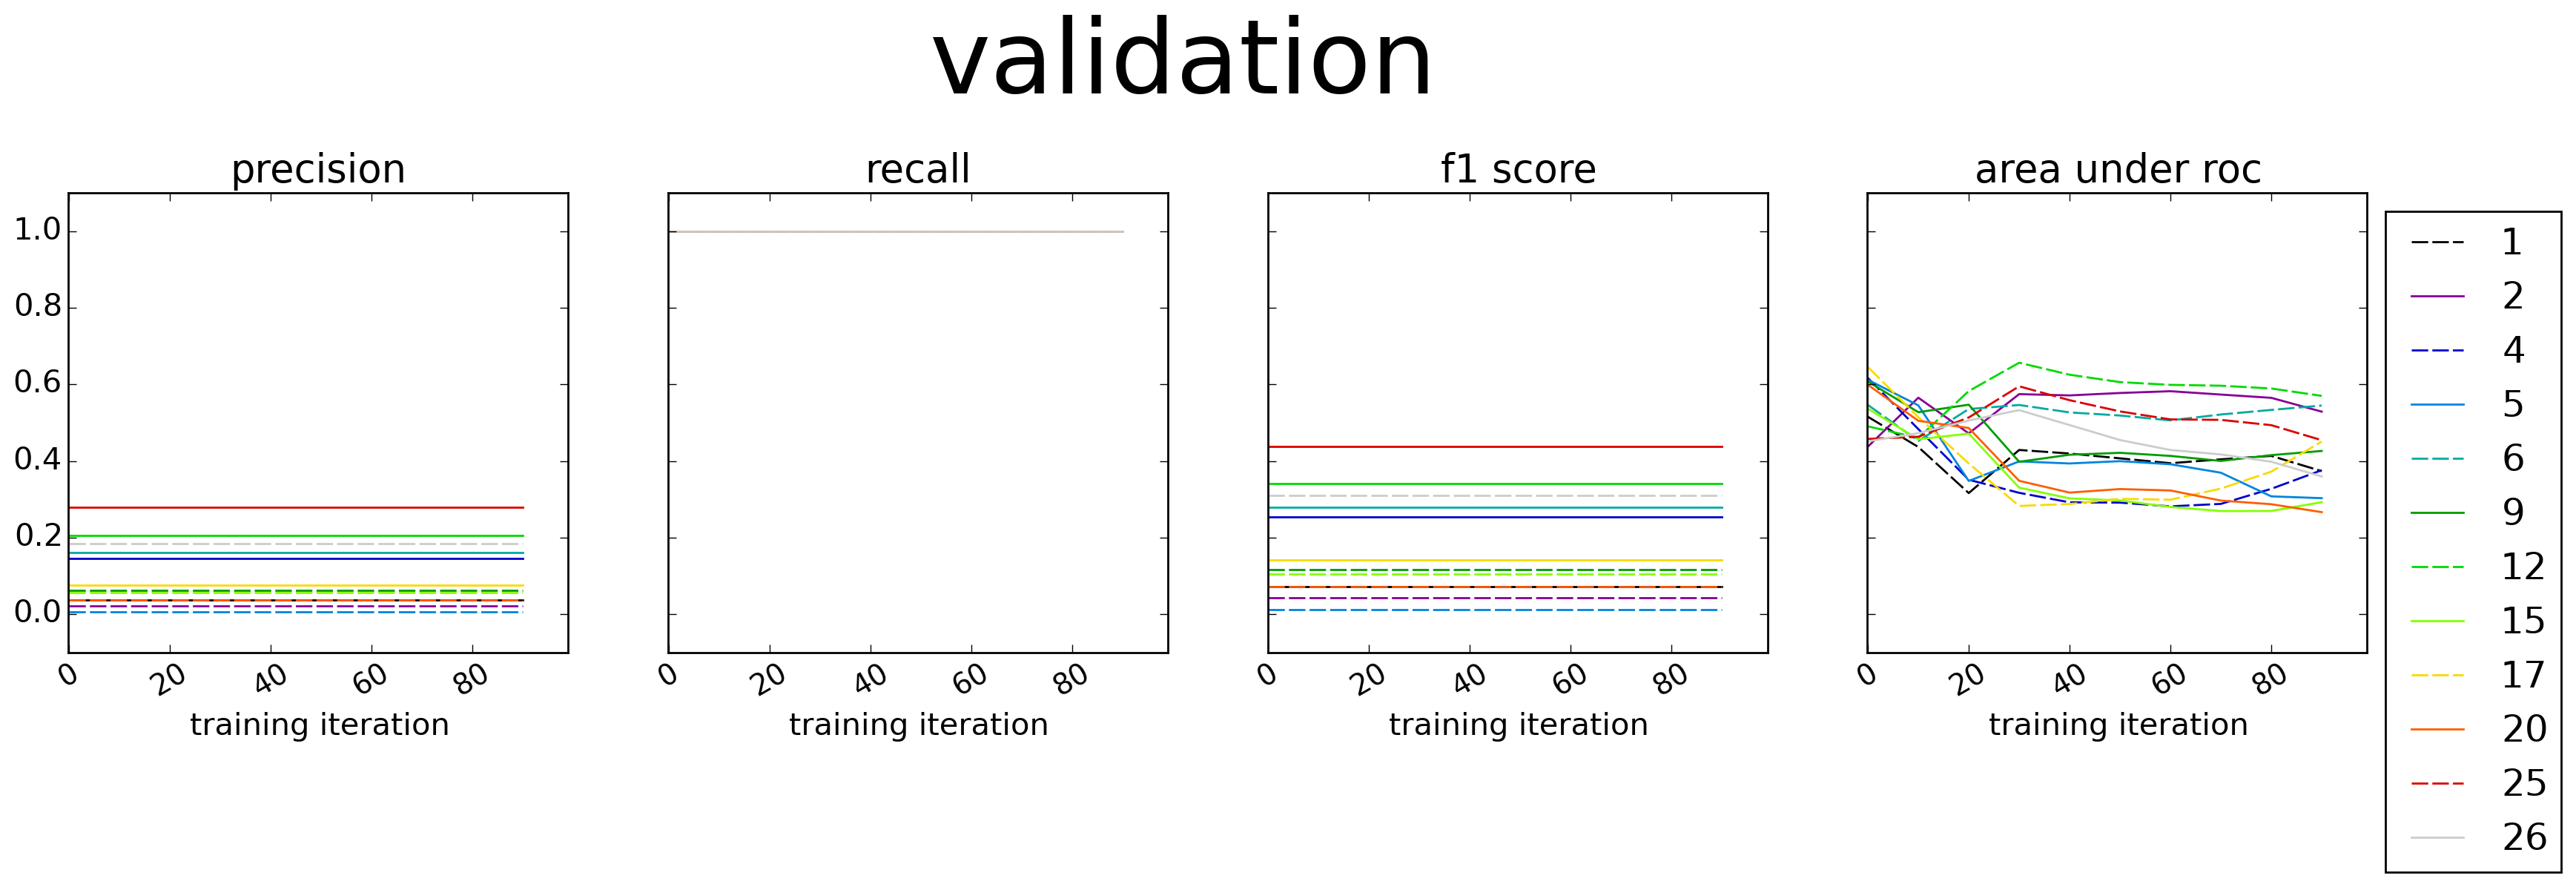

In [6]:
r.au('train',smooth=False)
r.au('validation',smooth=False)
# r.roc_plot('final')
# r.roc_plot('early')
# r.test_confusion('early')

# Test set:

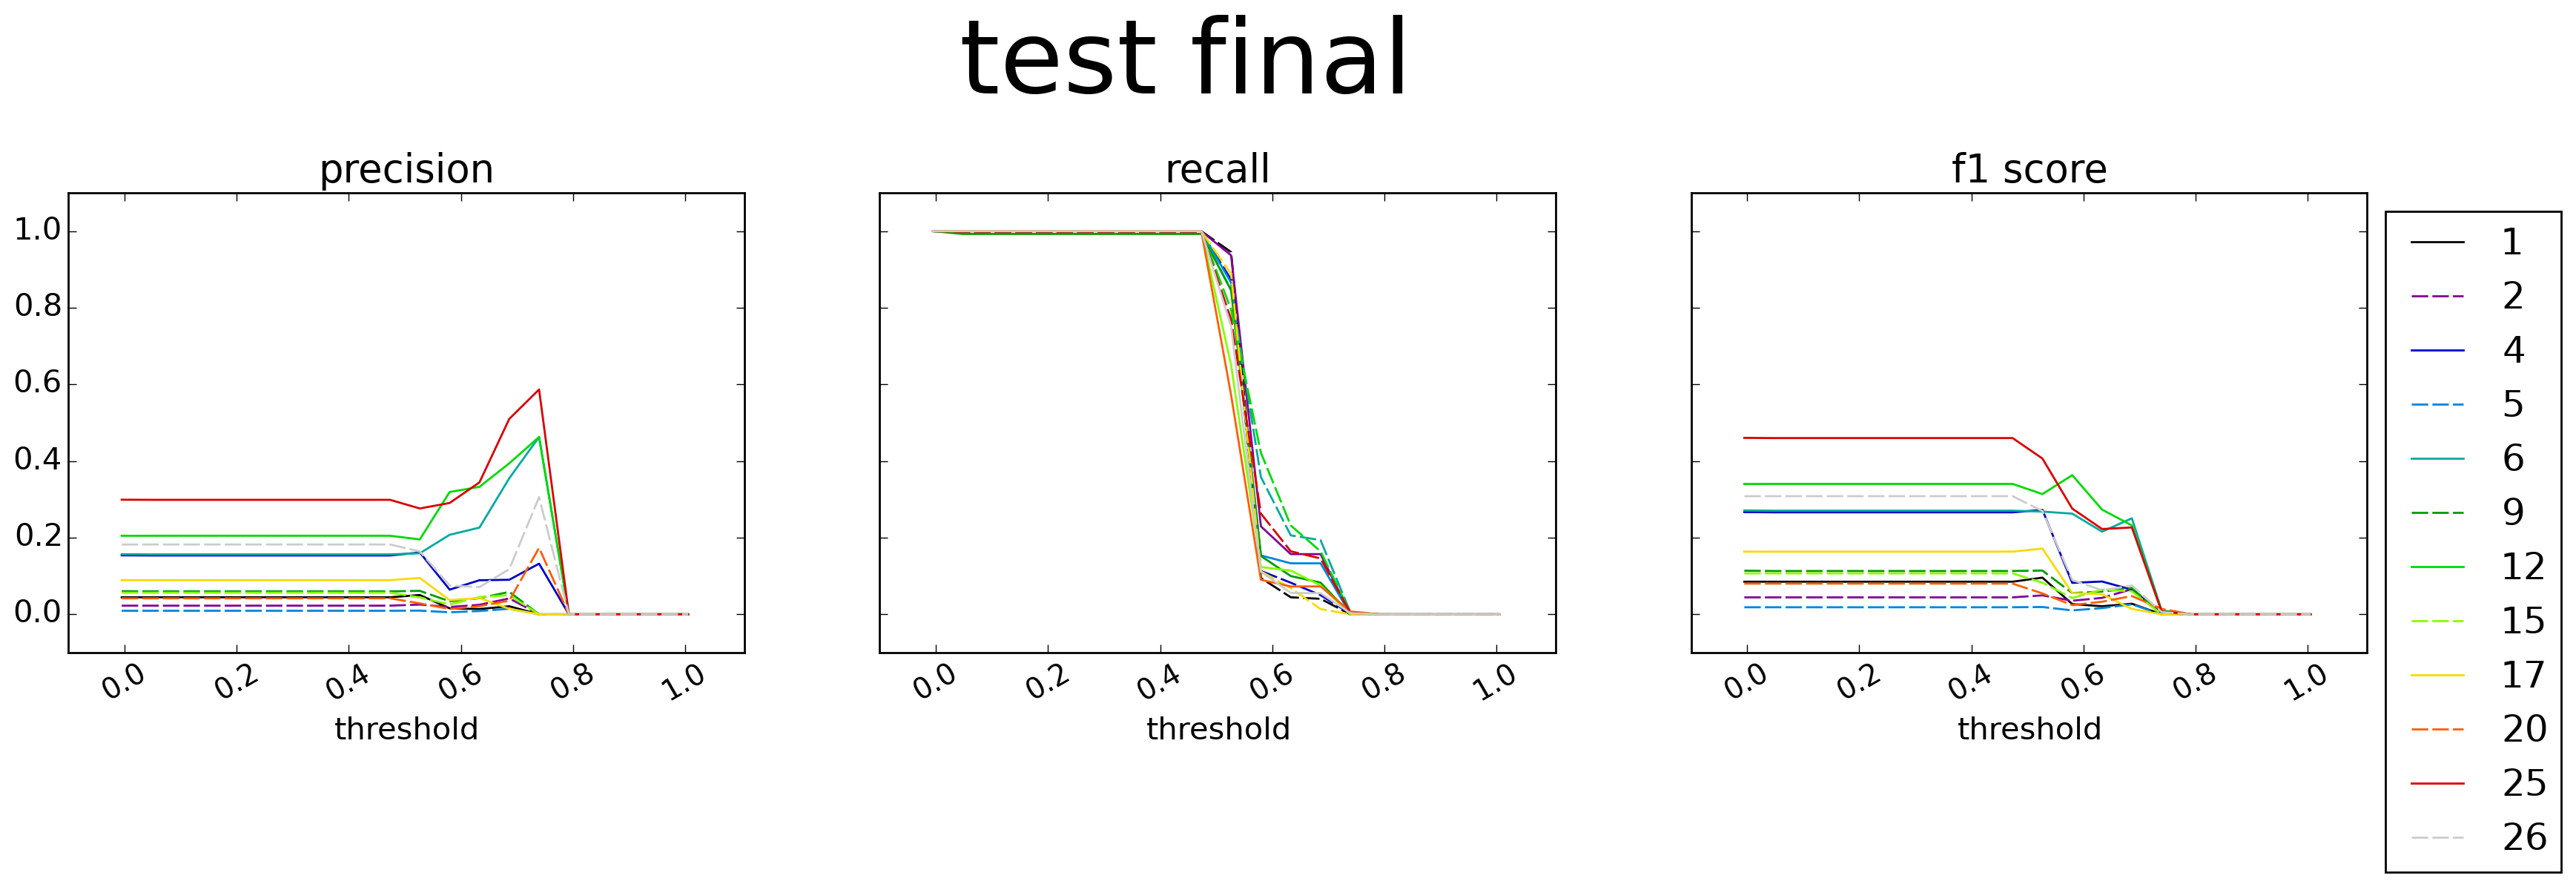

Test ROC values for each class:
(values for p,r,f1 are maximums)
class	roc	roc	f1	p	r	
1 	0.38 	fail 	0.1 	0.05 	1.0
2 	0.51 	fail 	0.07 	0.04 	1.0
4 	0.37 	fail 	0.27 	0.16 	1.0
5 	0.42 	fail 	0.03 	0.01 	1.0
6 	0.52 	fail 	0.27 	0.46 	1.0
9 	0.42 	fail 	0.11 	0.06 	1.0
12 	0.54 	fail 	0.36 	0.46 	1.0
15 	0.35 	fail 	0.11 	0.06 	1.0
17 	0.43 	fail 	0.17 	0.09 	1.0
20 	0.32 	fail 	0.08 	0.17 	1.0
25 	0.43 	fail 	0.46 	0.59 	1.0
26 	0.34 	fail 	0.31 	0.31 	1.0
average f1 =  0.194686833644
average roc =  0.419342402534


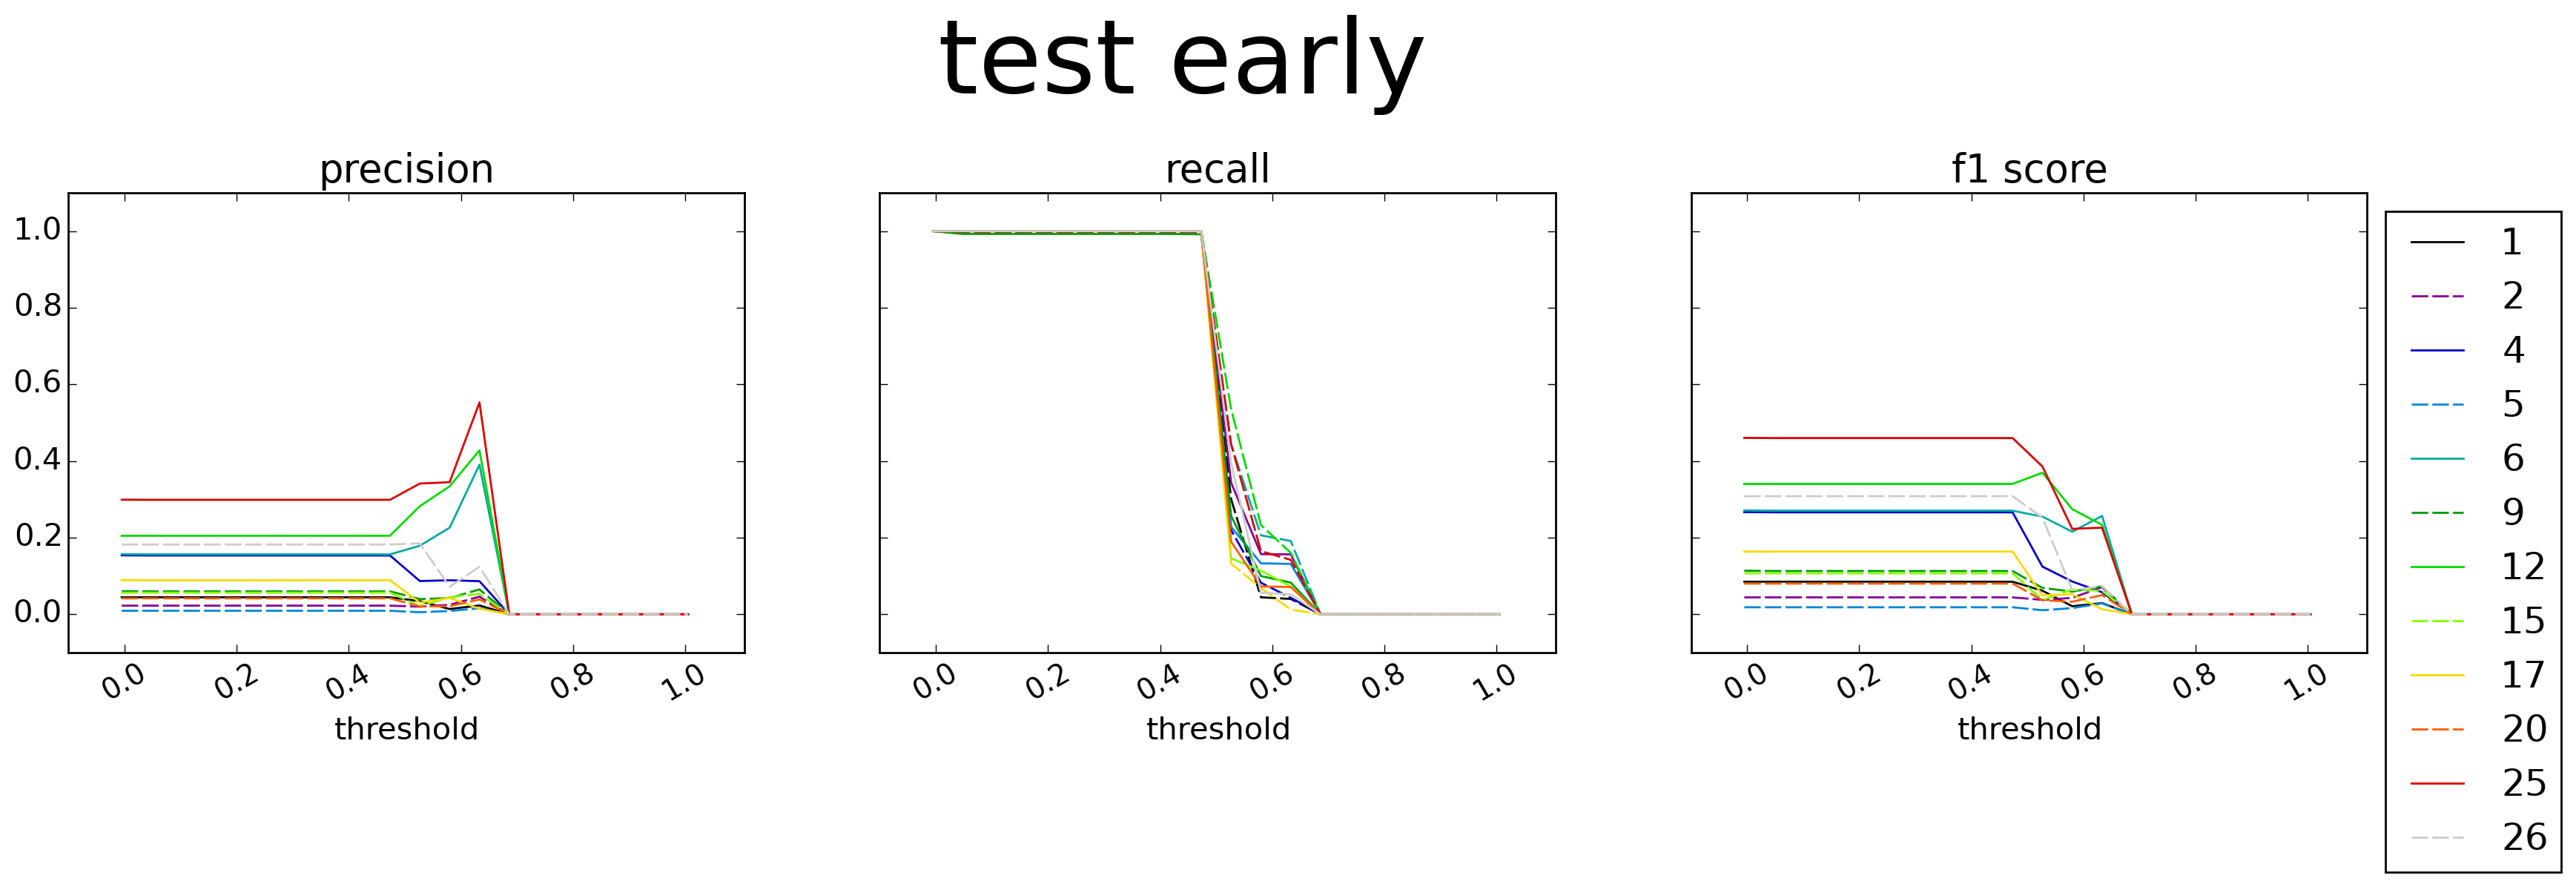

Test ROC values for each class:
(values for p,r,f1 are maximums)
class	roc	roc	f1	p	r	
1 	0.42 	fail 	0.09 	0.04 	1.0
2 	0.51 	fail 	0.07 	0.05 	1.0
4 	0.27 	fail 	0.27 	0.15 	1.0
5 	0.44 	fail 	0.03 	0.02 	1.0
6 	0.5 	fail 	0.27 	0.39 	1.0
9 	0.39 	fail 	0.11 	0.07 	1.0
12 	0.61 	poor 	0.37 	0.43 	1.0
15 	0.31 	fail 	0.11 	0.06 	1.0
17 	0.27 	fail 	0.16 	0.09 	1.0
20 	0.39 	fail 	0.08 	0.04 	1.0
25 	0.54 	fail 	0.46 	0.55 	1.0
26 	0.46 	fail 	0.31 	0.19 	1.0
average f1 =  0.193817693294
average roc =  0.426458385074


In [7]:
r.au('test',smooth=False,model='final')
r.au('test',smooth=False,model='early')

In [8]:
r.test_confusion('final')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Class  1 threshold:  0.53
	[  2850 	 165 	]
	[  53677 	 11138 	]
	roc:	0.38
	f1:	0.1
	p:	0.05
	r:	0.95
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Class  2 threshold:  0.69
	[  241 	 1293 	]
	[  5559 	 60737 	]
	roc:	0.51
	f1:	0.07
	p:	0.04
	r:	0.16
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Class  4 threshold:  0.53
	[  9124 	 1319 	]
	[  47403 	 9984 	]
	roc:	0.37
	f1:	0.27
	p:	0.16
	r:	0.87
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Class  5 threshold:  0.69
	[  84 	 547 	]
	[  5716 	 61483 	]
	roc:	0.42
	f1:	0.03
	p:	0.01
	r:	0.13
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Class  6 threshold:  -0.01
	[  10640 	 0 	]
	[  57190 	 0 	]
	roc:	0.52
	f1:	0.27
	p:	0.16
	r:	1.0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Class  9 threshold:  0.53
	[  3462 	 632 	]
	[  53065 	 10671 	]
	roc:	0.42
	f1:	0.11
	p:	0.06
	r:	0.85
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Class  12 threshold:  0.58
	[  5857 	 8046 	]
	[  12493 	 41434 	]
	roc:	0.54
	f1:	0.36
	p:	0.32
	r

## 

(2, 100, 47, 47)


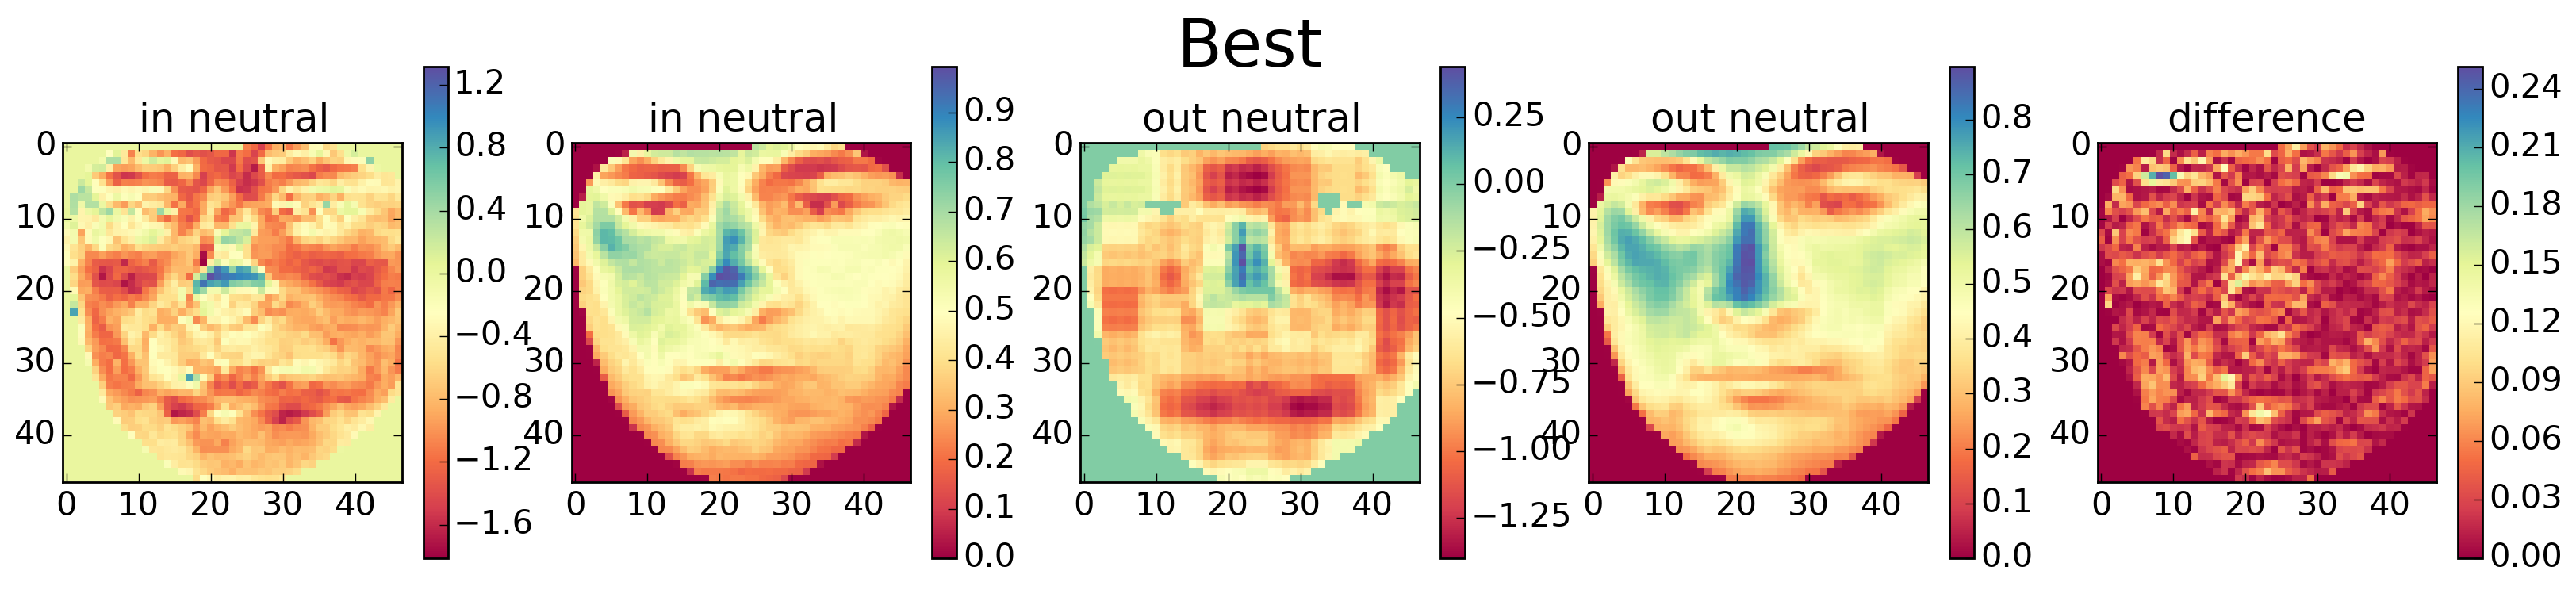

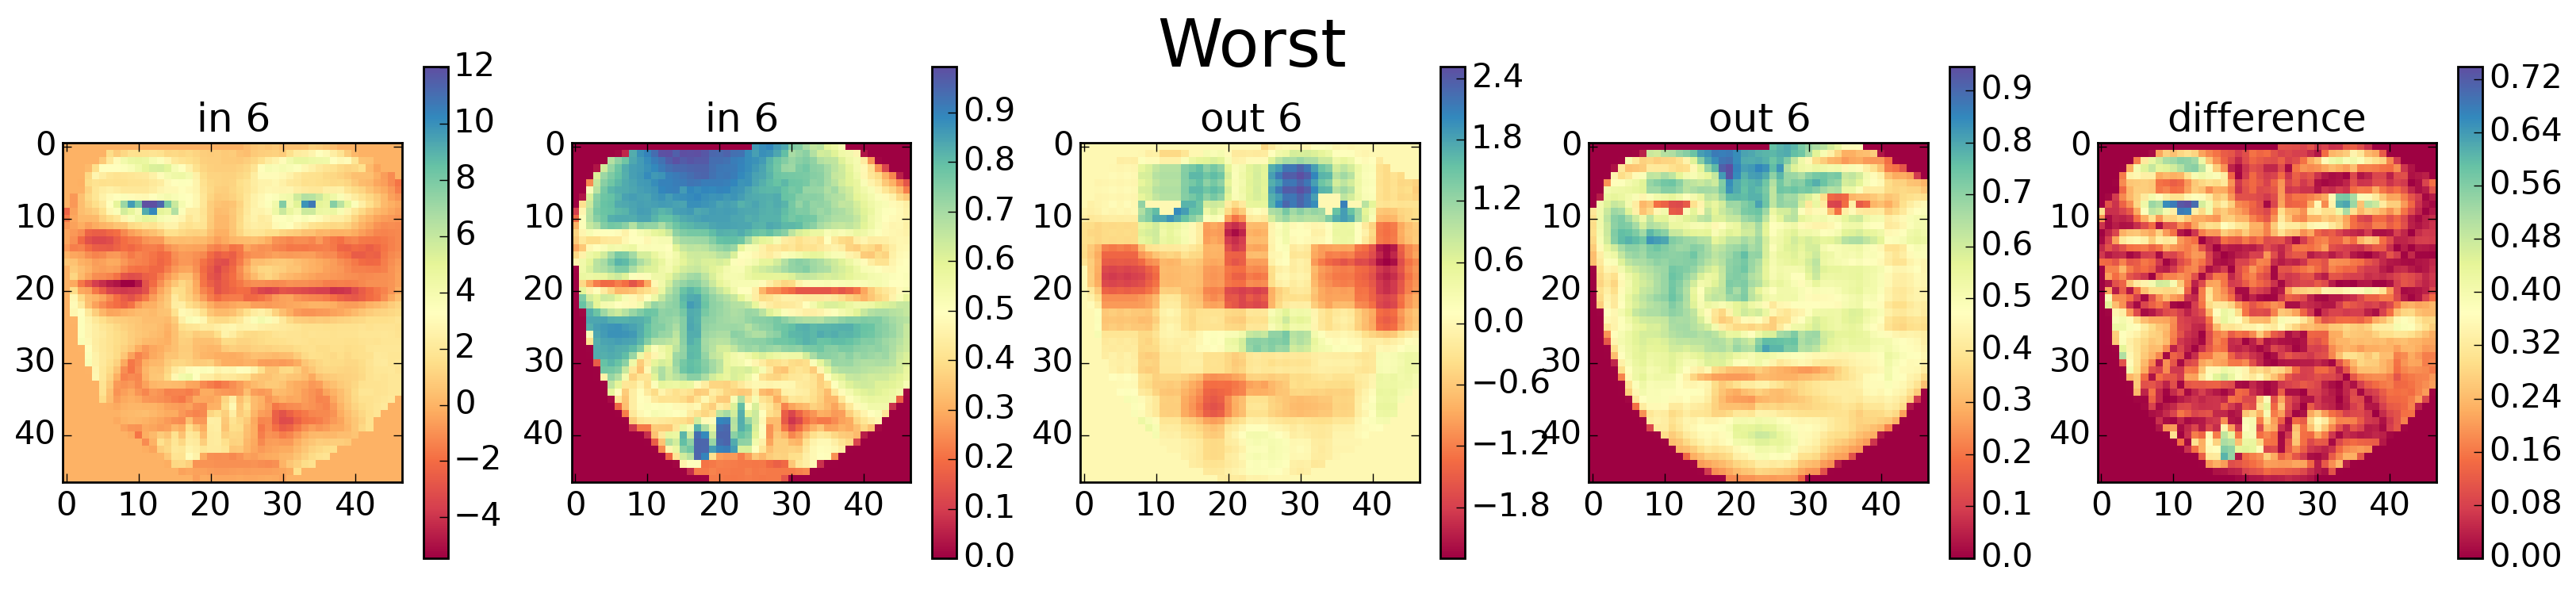

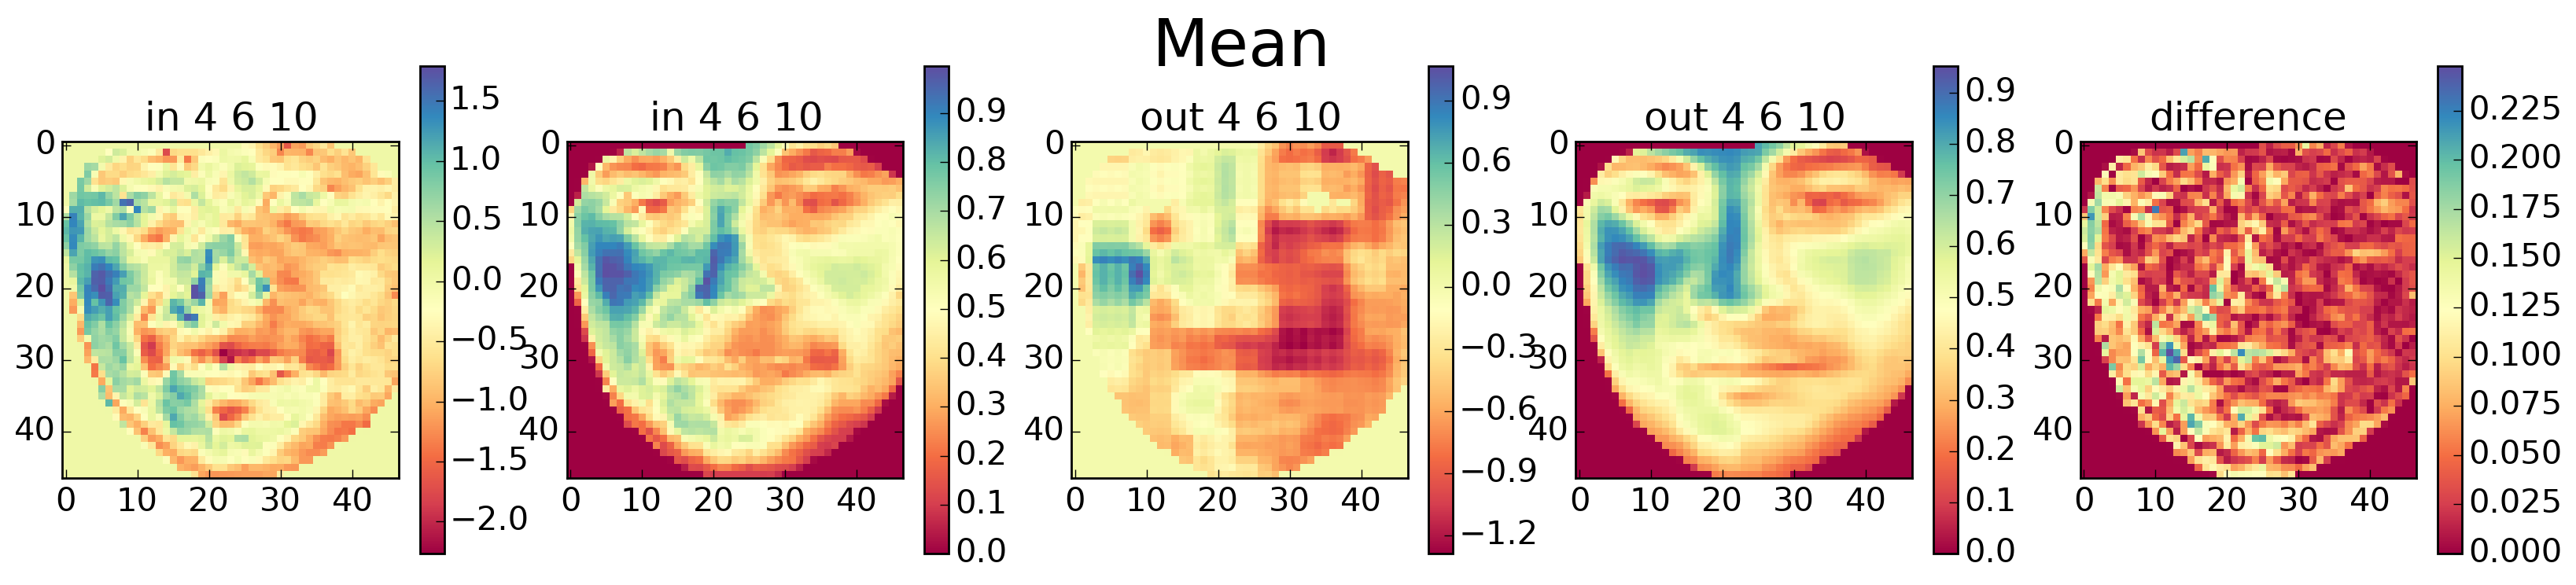

In [63]:
def mean_squared(x,y):
    return np.sqrt((np.power(x-y,2)).mean())

def auto_images(model,image,dataset):
    if dataset == 'train':
        input = model['auto_images'][0][0,image,:,:]
        output = model['auto_images'][0][1,image,:,:]
    else:
        input = model['auto_images'][1][0,image,:,:]
        output = model['auto_images'][1][1,image,:,:]
    diff = np.subtract(input,output)
    print mean_squared(input,output)
    #     print 'error = ', round(np.sqrt((diff**2).mean())*100.0,2), '%'
    fig = plt.figure()
    cmap = 'Spectral'
    plt.subplot(131)
    plt.imshow(input,interpolation='none',cmap=cmap,vmin=-1,vmax=1)
    plt.title('Input Image')
    plt.colorbar()
    plt.subplot(132)
    plt.imshow(output,interpolation='none',cmap=cmap,vmin=-1,vmax=1)
    plt.title('Output Image')
    plt.colorbar()
    plt.subplot(133)
    plt.imshow(diff,interpolation='none',cmap=cmap)#,vmin=-4,vmax=4)
    plt.title('Difference Image')
    plt.colorbar()
    plt.show()
    
import helper
reload(helper)
plot_images = helper.plot_images

def stra(a):
    s = ' '
    for i,number in enumerate(a):
        if number > 0:
            s += str(i) + ' '
    if s == ' ':
        return ' neutral'
    return s
    
def auto_images_smart(model,n):
    print model['o_small'].shape
    range = None
    images = []
    names = []
    INVED = 1
    images.append(model['i_small'][0,n]); names.append('in' + stra(model['label_small'][n]))
    images.append(model['i_small'][1,n]); names.append('in' + stra(model['label_small'][n]))
    images.append(model['o_small'][0,n]); names.append('out' + stra(model['label_small'][n]))
    images.append(model['o_small'][1,n]); names.append('out' + stra(model['label_small'][n]))
    images.append(np.abs(model['i_small'][1,n]-model['o_small'][1,n])); names.append('difference')
    plot_images(images=images,names=names,range=range,title='Best')
    
    images = []
    names = []
    images.append(model['i_big'][0,n]); names.append('in' + stra(model['label_big'][n]))
    images.append(model['i_big'][1,n]); names.append('in' + stra(model['label_big'][n]))
    images.append(model['o_big'][0,n]); names.append('out' + stra(model['label_big'][n]))
    images.append(model['o_big'][1,n]); names.append('out' + stra(model['label_big'][n]))
    images.append(np.abs(model['i_big'][1,n]-model['o_big'][1,n])); names.append('difference')
    plot_images(images=images,names=names,range=range,title='Worst')
    
    images = []
    names = []
    images.append(model['i_mean'][0,n]); names.append('in' + stra(model['label_mean'][n]))
    images.append(model['i_mean'][1,n]); names.append('in' + stra(model['label_mean'][n]))
    images.append(model['o_mean'][0,n]); names.append('out' + stra(model['label_mean'][n]))
    images.append(model['o_mean'][1,n]); names.append('out' + stra(model['label_mean'][n]))
    images.append(np.abs(model['i_mean'][1,n]-model['o_mean'][1,n])); names.append('difference')
    plot_images(images=images,names=names,range=range,title='Mean')

auto_images_smart(r.final_model,2)

early model
0.154310656142


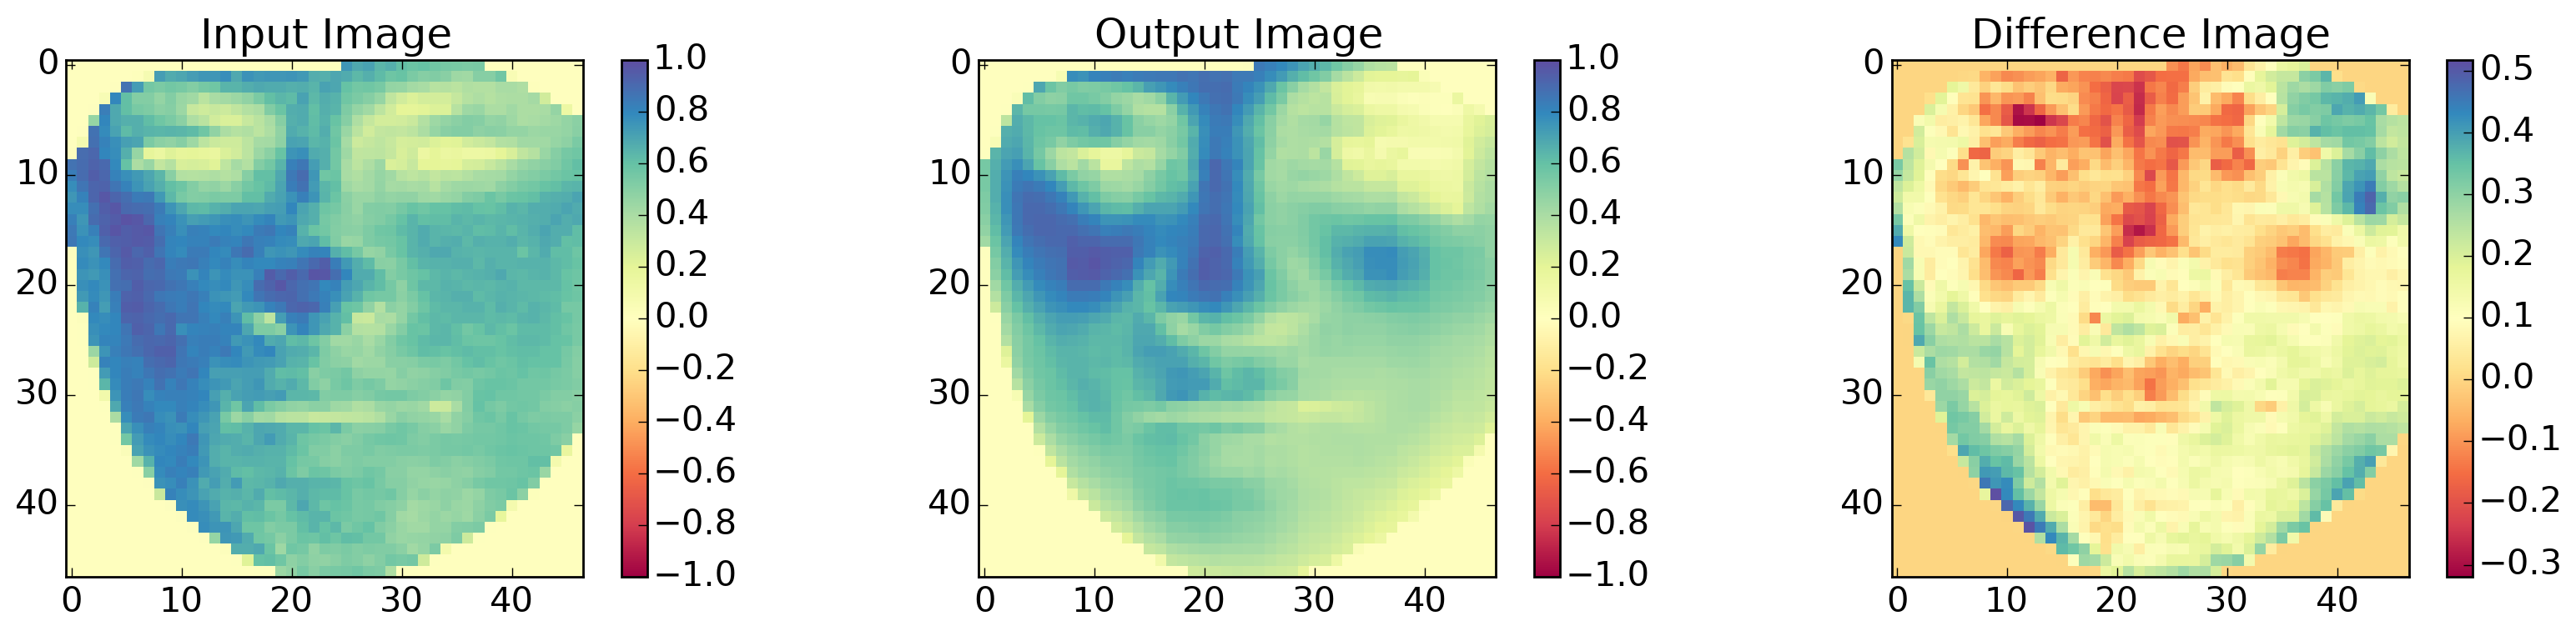

0.0554833163926


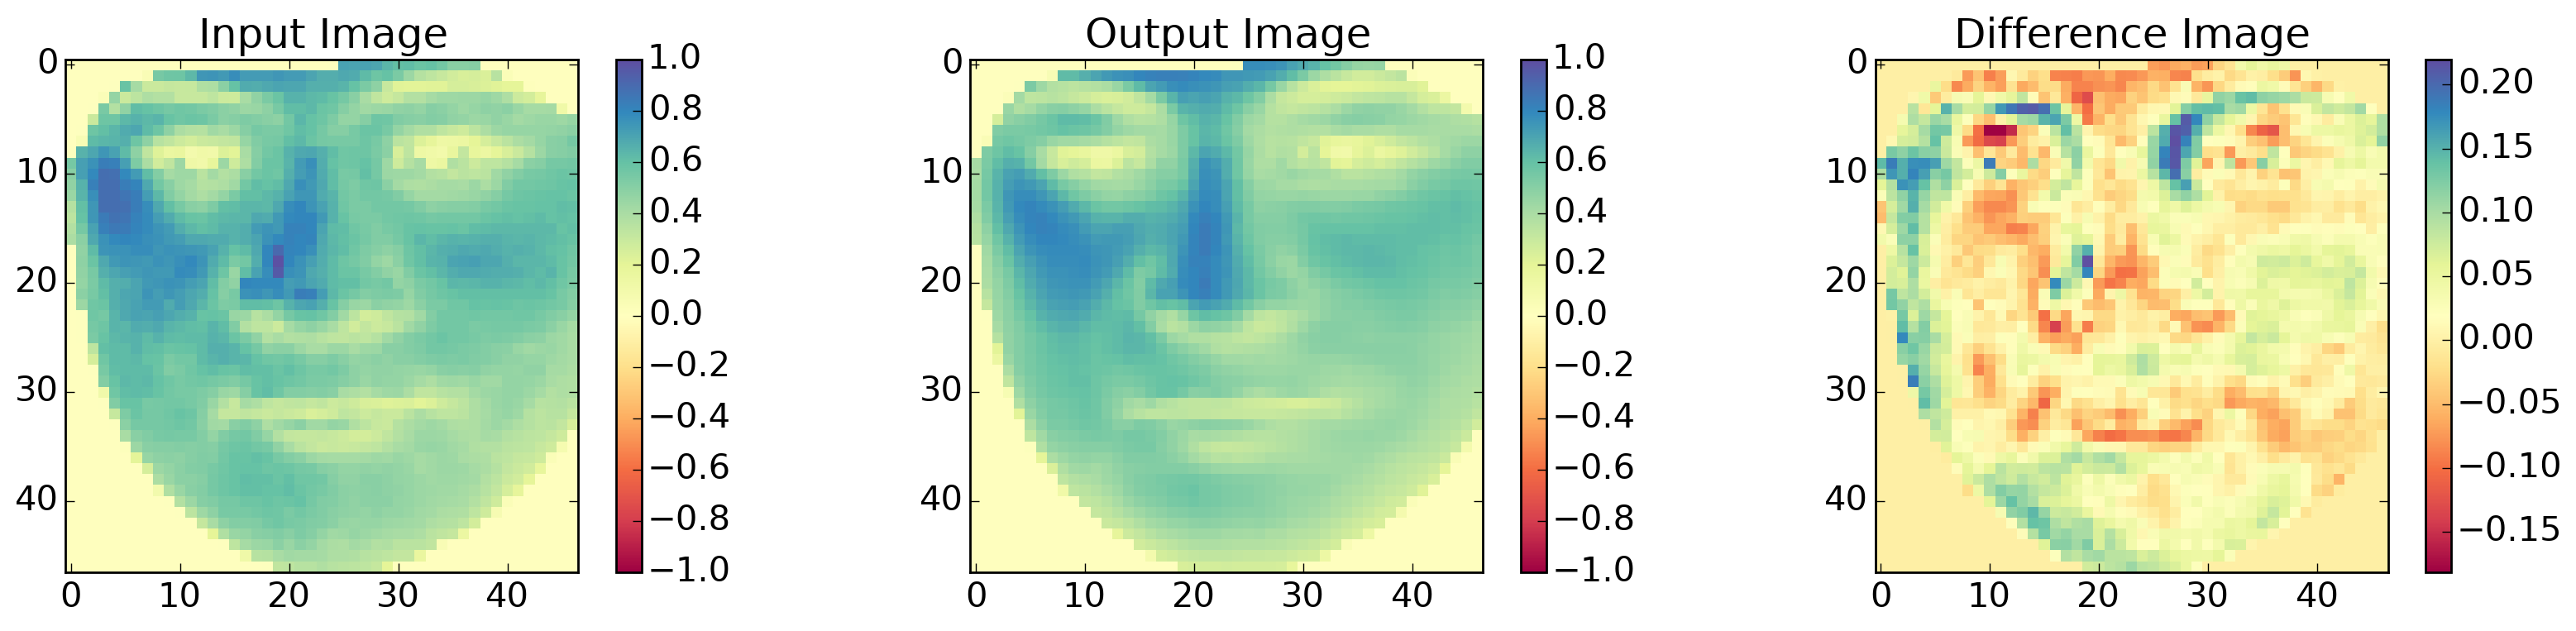

final model
0.283330634653


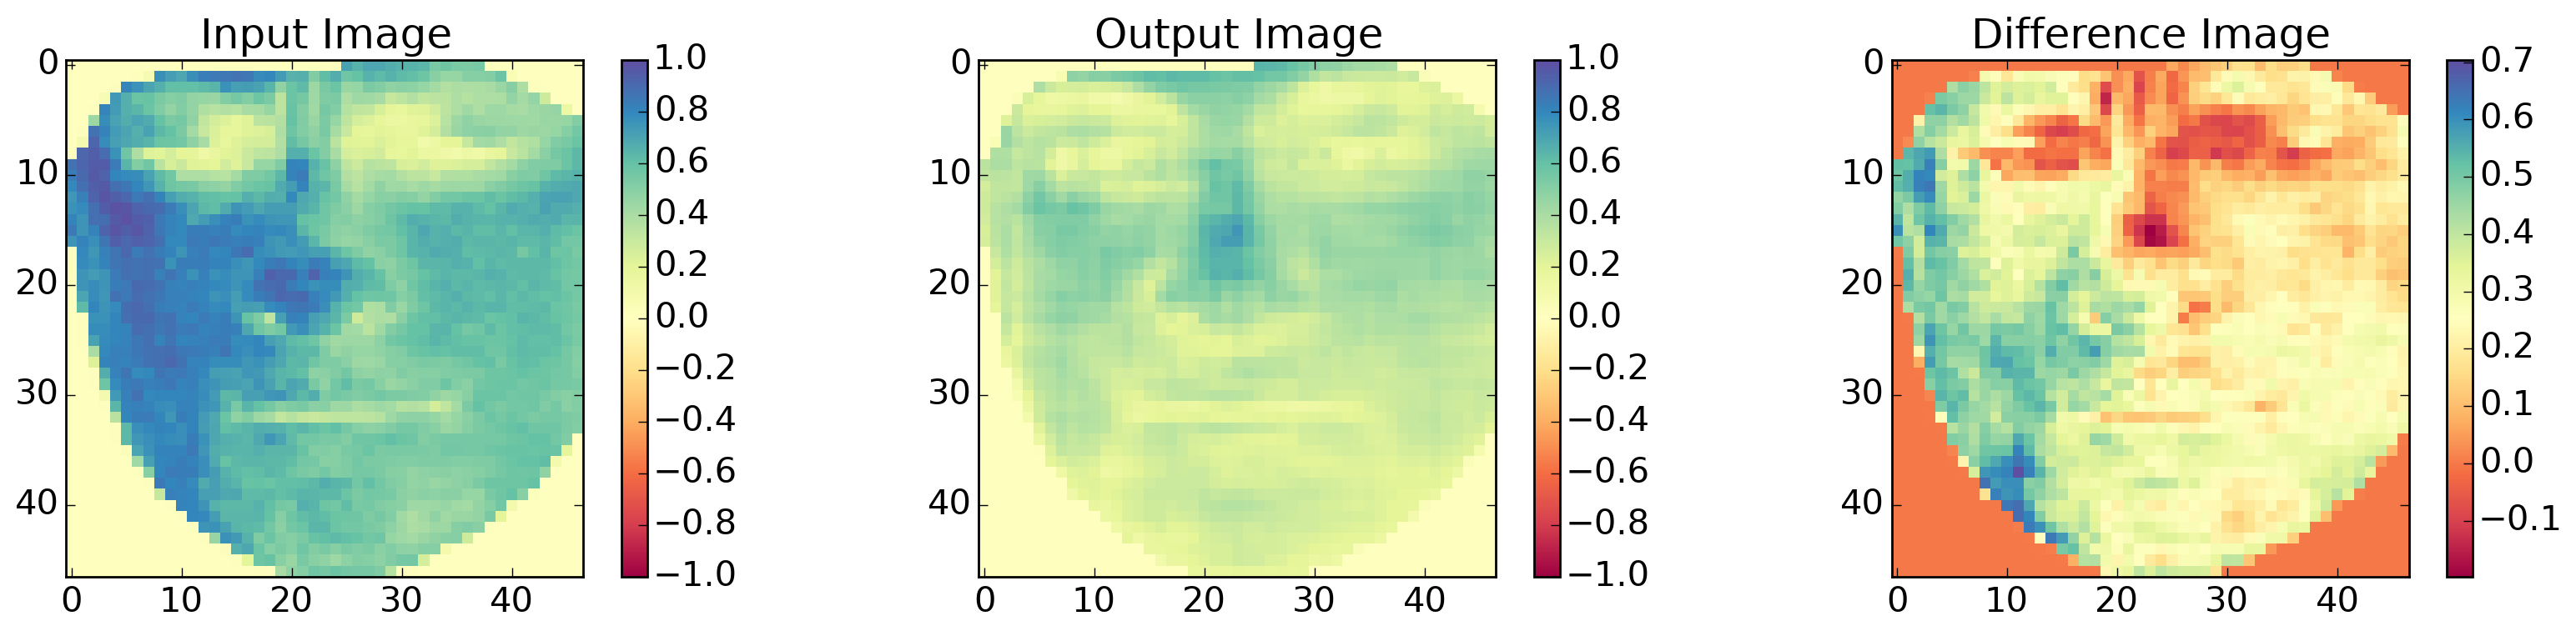

0.0513788106002


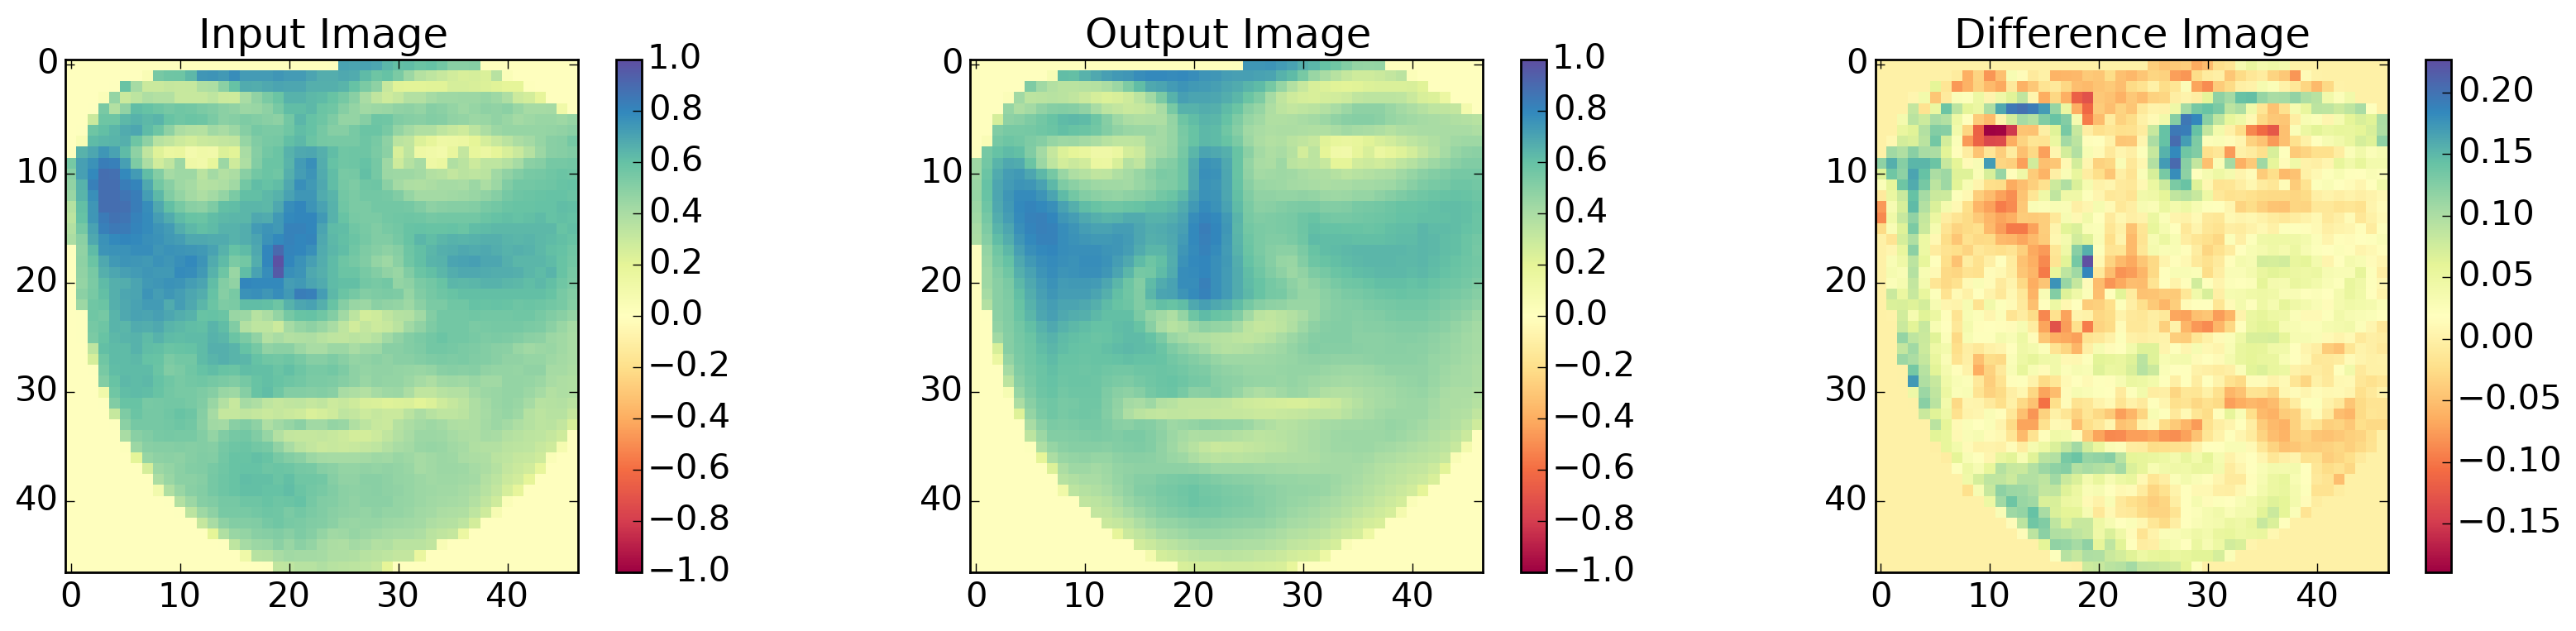

In [10]:
i = 20
print 'early model'
auto_images(r.early_model,i,'train')
auto_images(r.early_model,i,'validation')
print 'final model'
auto_images(r.final_model,i,'train')
auto_images(r.final_model,i,'validation')

In [51]:
r.print_config()

autoencoder


function,constant
constant,1.0
decoder,auto_cnn_2
step_percent,0.8
activation,linear
poly_order,1


weights


weights initialisation,"['std_dev', 0.001]"
bias initial value,0.01


global


dropout_rate,1.0
optimizer,adam
seed_randomness,True
fc2_neuron_count,0
learning_rate,0.001
batch_size,100
final_activation,softmax
fc1_neuron_count,3136
seed,1
iterations,100
dump_frames,False


data


image_region,full
remove_empty_labels,False
validation_subjects,"[1, 3, 5, 7, 9, 11, 13, 17, 21, 24, 26, 28, 30, 32]"
batch_randomisation,True
dataset,disfa
scaling,none
train_subjects,"[2, 4, 6, 8, 10, 12, 16, 18, 23, 25, 27, 29, 31]"
disfa_au_map,"[1, 2, 4, 5, 6, 9, 12, 15, 17, 20, 25, 26]"
test_subjects,"[1, 3, 5, 7, 9, 11, 13, 17, 21, 24, 26, 28, 30, 32]"
normalisation_type,face
threshold,1


results


early_stop_iteration,50


crop


crop,"[0, 0, 0, 0]"
resize_scale,0.4


In [12]:
a = np.array([])
a = np.append(a,np.array([1,2,3]))
a = np.append(a,np.array([9]))
a = np.append(a,np.array([10]))
print a

[  1.   2.   3.   9.  10.]


In [13]:
print np.zeros((3,3))[:]

[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
